<a href="https://colab.research.google.com/github/fsrt16/Financial-Analytics/blob/master/BhartiAirtel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [7]:
df = pd.read_csv('BO.csv')
taget = 'Volume'
nrows , ncols = df.shape
df = df.drop_duplicates()
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

Date        Open        High  ...       Close   Adj Close    Volume
2543  2012-04-02  309.595001  314.368988  ...  312.074005  297.209412   93341.0
1133  2006-07-20  165.009995  169.830002  ...  167.121994  157.753281  864403.0
2912  2013-09-26  309.825012  310.283997  ...  307.162994  294.790649  224887.0
67    2002-05-24   15.583000   15.835500  ...   15.353500   14.492798  301643.0
2411  2011-09-20  353.980988  360.544006  ...  359.442993  342.322144  187050.0

[5 rows x 7 columns]

In [0]:
Datetime=df['Date'].str.split('-', n = 3, expand = True)
df['Year']=Datetime[0]
df['Month']=Datetime[1]
df['Day']=Datetime[2]

In [0]:
import datetime 
import calendar 
def findDay(date):
  born=[]
  for i in range(0,len(date)):
    born.append(calendar.day_name[datetime.datetime.strptime(date[i], '%d %m %Y').weekday()] )
    
  return (born)
def weekday(date):
  lt=[]
  for i in range(0,len(date)):
    
    if date[i] in ['Monday','Tuesday','Thursday','Wednesday']:
      lt.append(1)
    else:
      lt.append(0)
  return lt
def  leap(date):
  import calendar
  lt=[]
  for i in range(0,len(date)):
    if (calendar.isleap(int(date[i]))) :
      lt.append(1)
    else:
      lt.append(0)
  return lt

In [0]:
df['yr']=df['Year']-2000

In [0]:
df['Day'] = (df['Day']).astype(int)
df['Month'] = (df['Month']).astype(int)
df['Year'] = (df['Year']).astype(int)


In [26]:
df.head()

Date        Open        High         Low  ...  Month  Day    dayname  yr
2543  2012-04-02  309.595001  314.368988  309.595001  ...      4    2  Wednesday  12
1133  2006-07-20  165.009995  169.830002  164.436996  ...      7   20   Thursday   6
2912  2013-09-26  309.825012  310.283997  302.480988  ...      9   26     Friday  13
67    2002-05-24   15.583000   15.835500   15.192900  ...      5   24     Monday   2
2411  2011-09-20  353.980988  360.544006  353.980988  ...      9   20    Tuesday  11

[5 rows x 12 columns]

In [0]:
df['Open'] = df['Open'].fillna((df['Open'].mean()))
df['High'] = df['High'].fillna((df['High'].mean()))
df['Low'] = df['Low'].fillna((df['Low'].mean()))
df['Close'] = df['Close'].fillna((df['Close'].mean()))
df['Adj Close'] = df['Adj Close'].fillna((df['Adj Close'].mean()))
df['Volume'] = df['Volume'].fillna((df['Volume'].mean()))


In [13]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [0]:
def FNCOL(var):
  fig, axs = plt.subplots(nrows=8 , figsize=(15,45))
  sns.boxplot(x="dayname", y=df[var], data=df,linewidth=2.5,ax=axs[0])
  sns.boxplot(x="Month", y=df[var], data=df,linewidth=2.5,ax=axs[1])
  sns.boxplot(x="Year", y=df[var], data=df,linewidth=2.5,ax=axs[2])
  sns.boxplot(x="Day", y=df[var], data=df,linewidth=2.5,ax=axs[3])
  sns.distplot(df[var], bins=20, kde=True, rug=True ,ax=axs[4]);
  sns.kdeplot(df[var], shade=True , ax=axs[4]);
  sns.scatterplot(x="yr", y=df[var], hue="dayname",data=df,ax=axs[5])
  sns.lineplot(x="Year", y=df[var],hue="dayname", data=df,ax=axs[6])
  sns.lineplot(x="Month", y=df[var],hue="dayname", data=df,ax=axs[7])



In [0]:
def FunBar(var):
  fig, axs = plt.subplots(nrows=6 , figsize=(15,80))
  sns.barplot(x="yr", y=df[var], data=df ,estimator=np.median,ax=axs[0])
  sns.barplot(x="dayname", y=df[var], data=df, estimator=np.median,ax=axs[1])
  sns.barplot(x="Month", y=df[var], data=df, estimator=np.median,ax=axs[2])
  sns.barplot(x="dayname", y=df[var], hue="yr", data=df,ax=axs[2])
  sns.barplot(x="Month", y=df[var], hue="yr", data=df,ax=axs[3])
  sns.barplot(x="yr", y=df[var], hue="dayname", data=df,ax=axs[4])
  sns.barplot(x="yr", y=df[var], hue="Month", data=df,ax=axs[5])

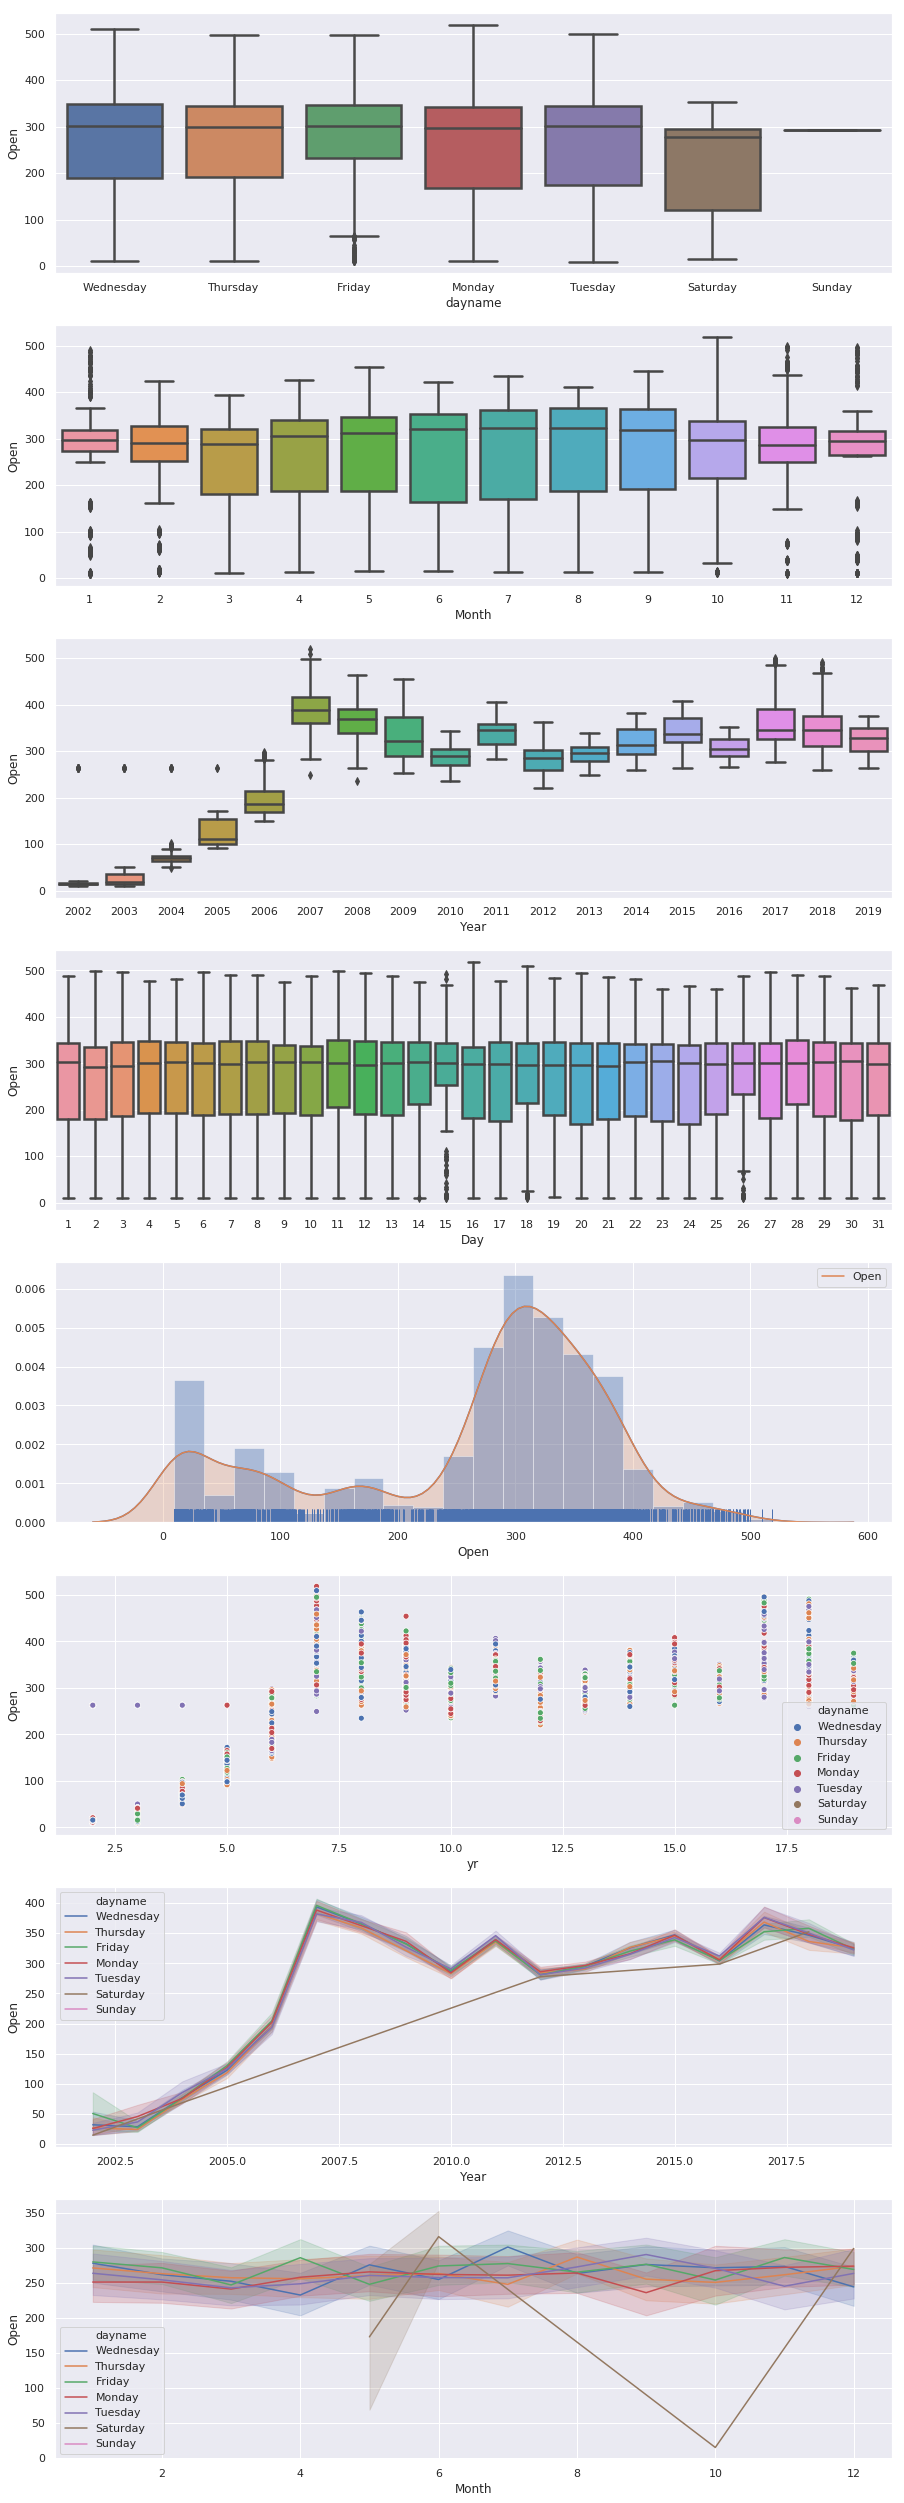

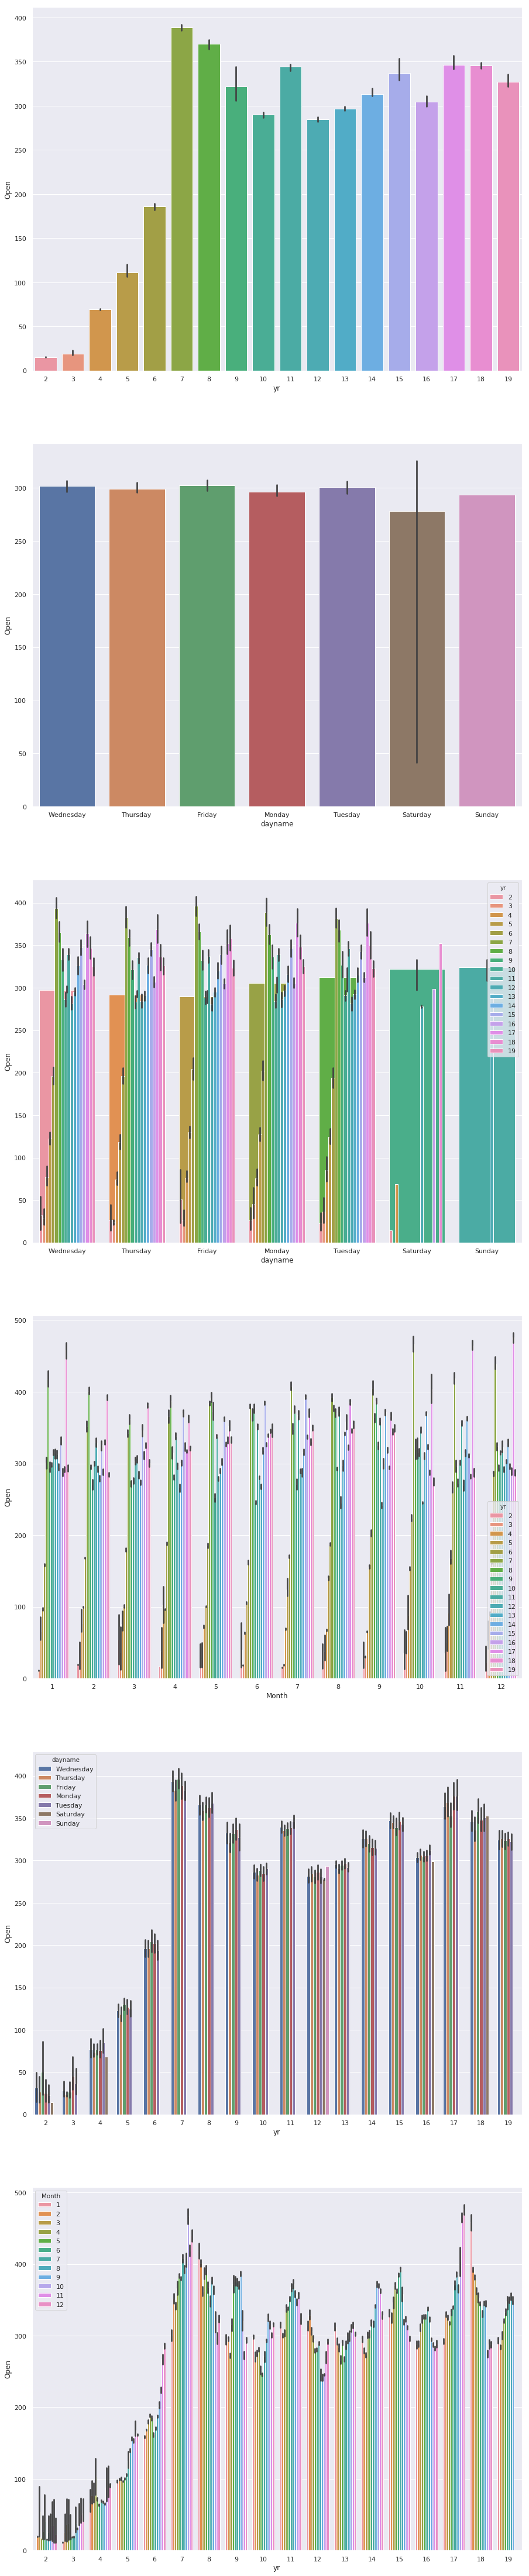

In [125]:
FNCOL("Open")
FunBar("Open")

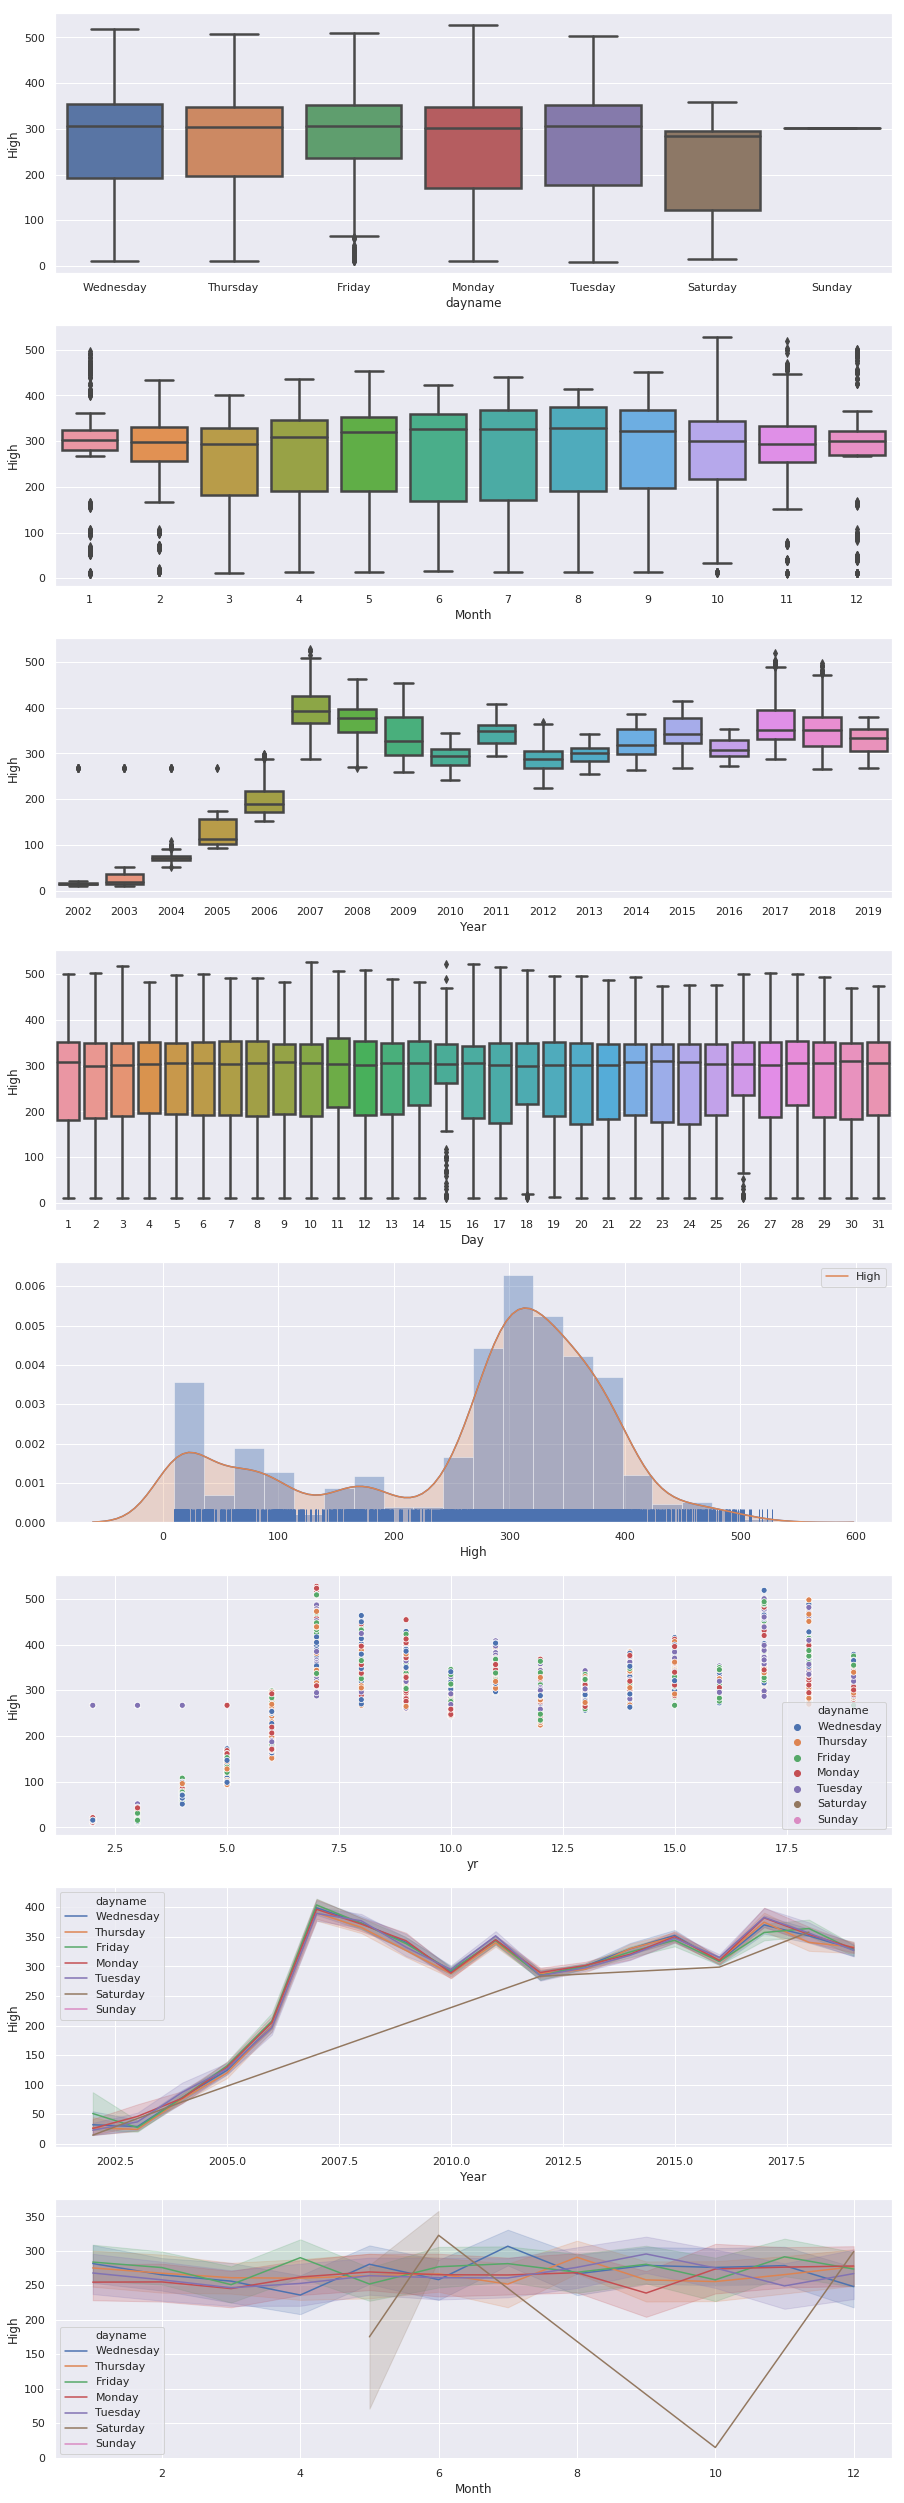

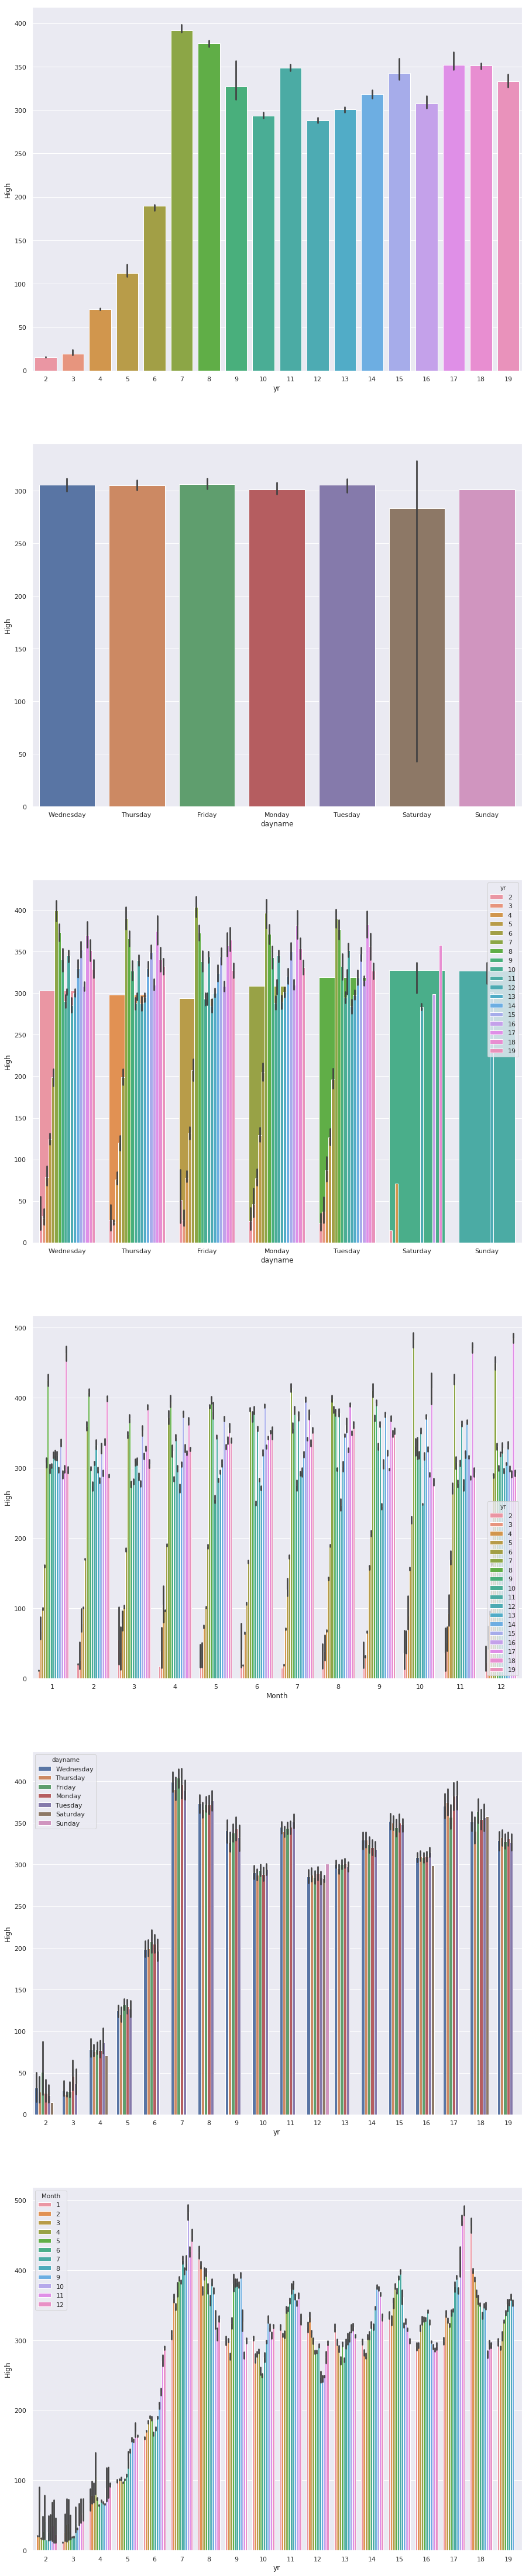

In [126]:
FNCOL("High")
FunBar("High")

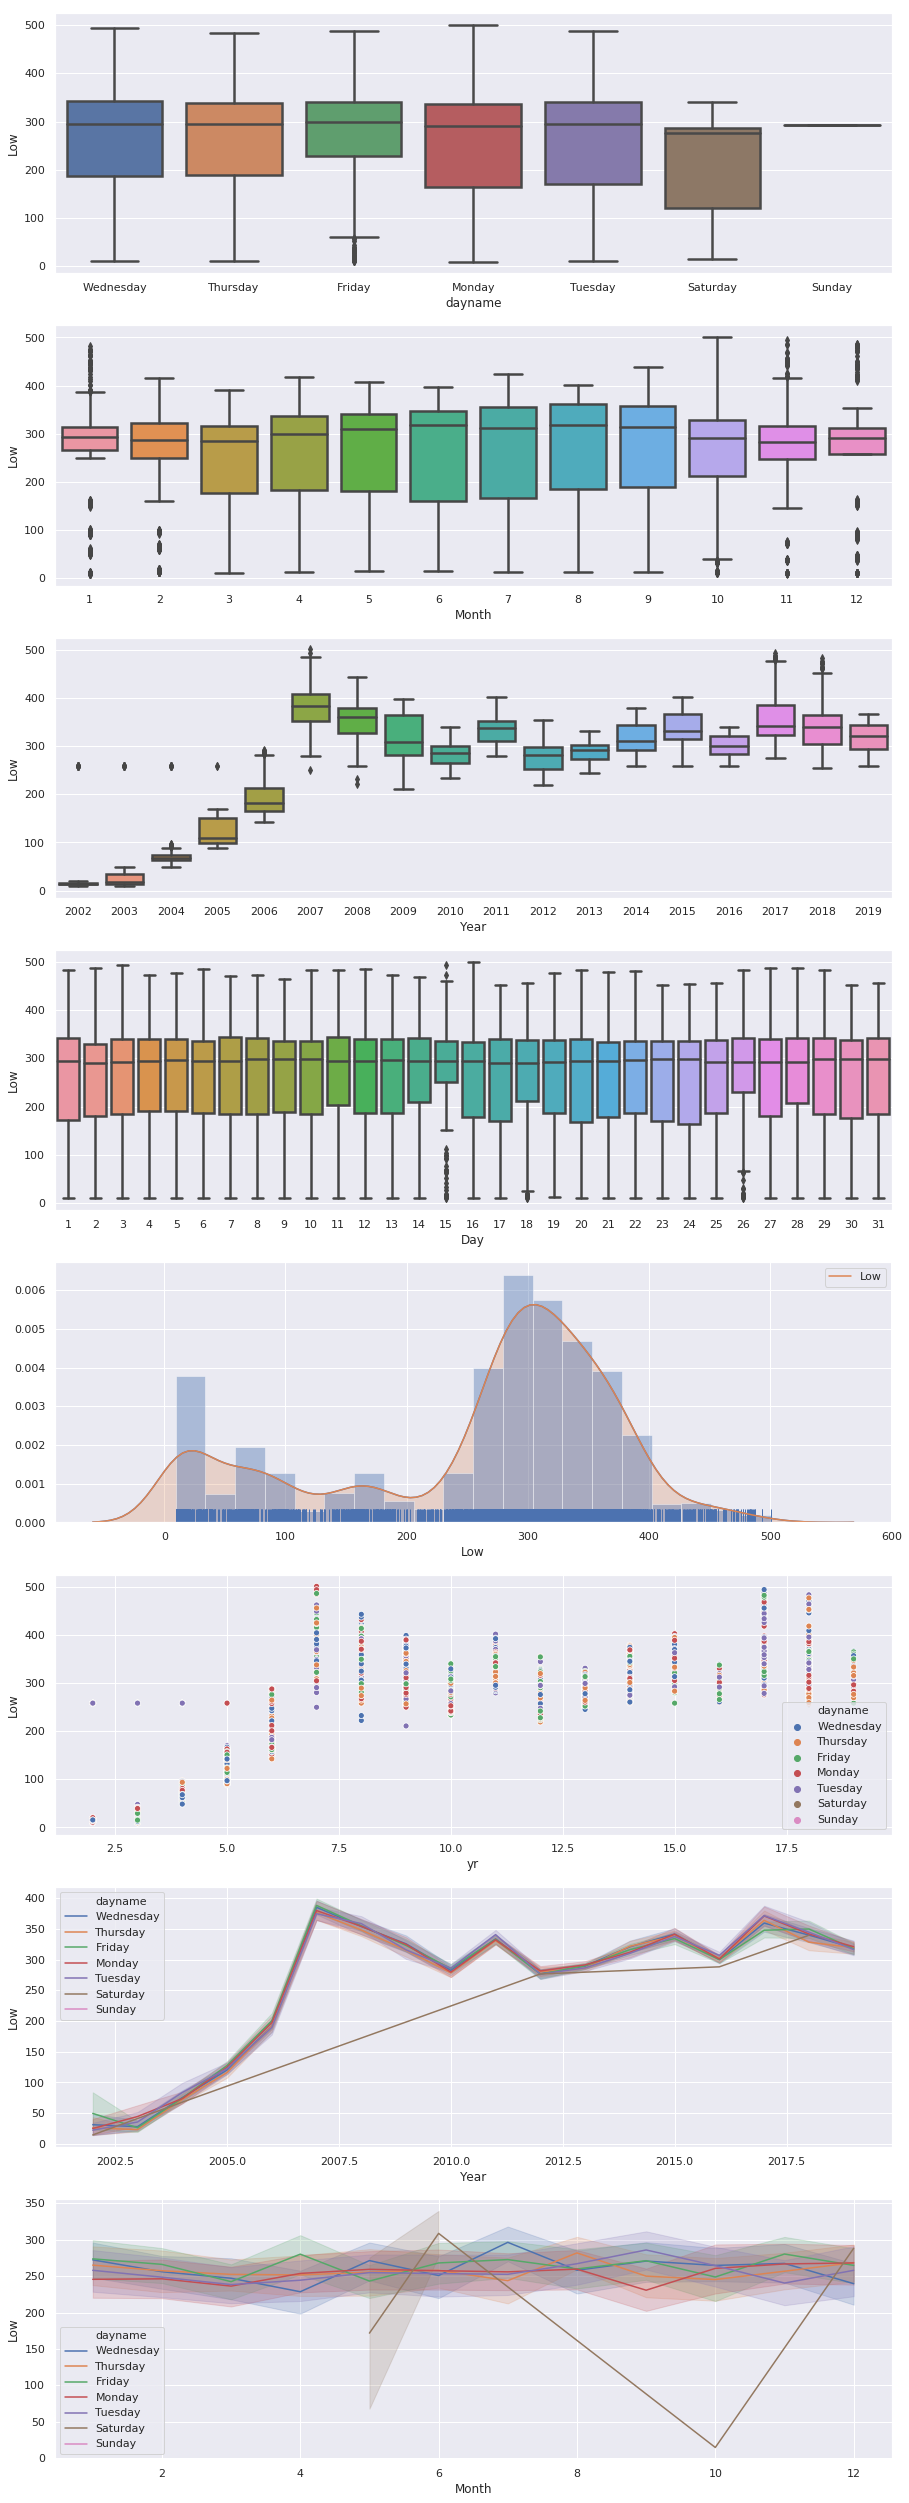

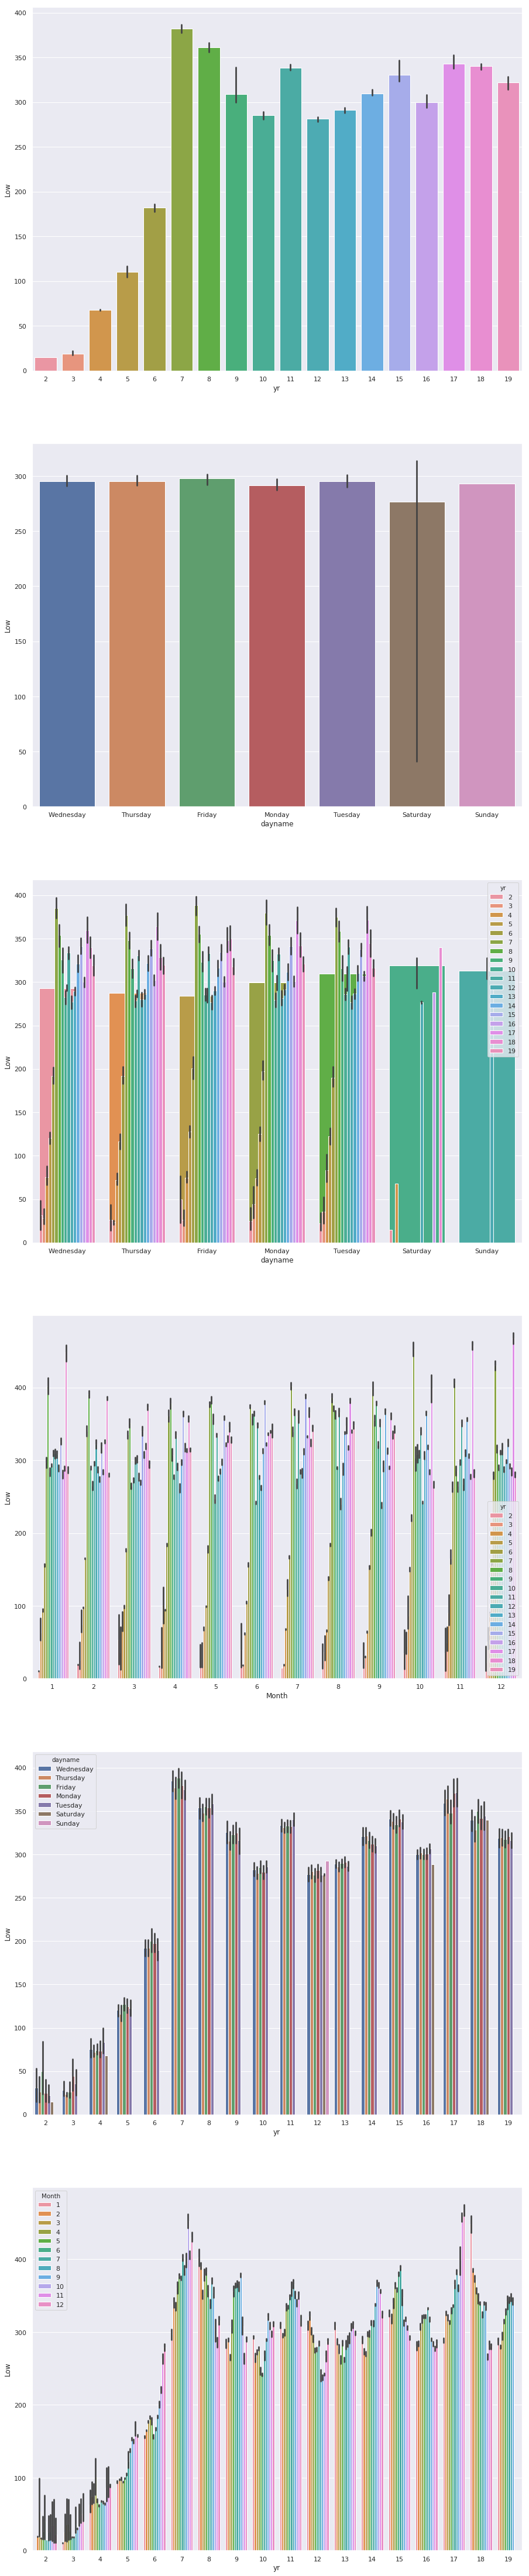

In [127]:
FNCOL("Low")
FunBar("Low")

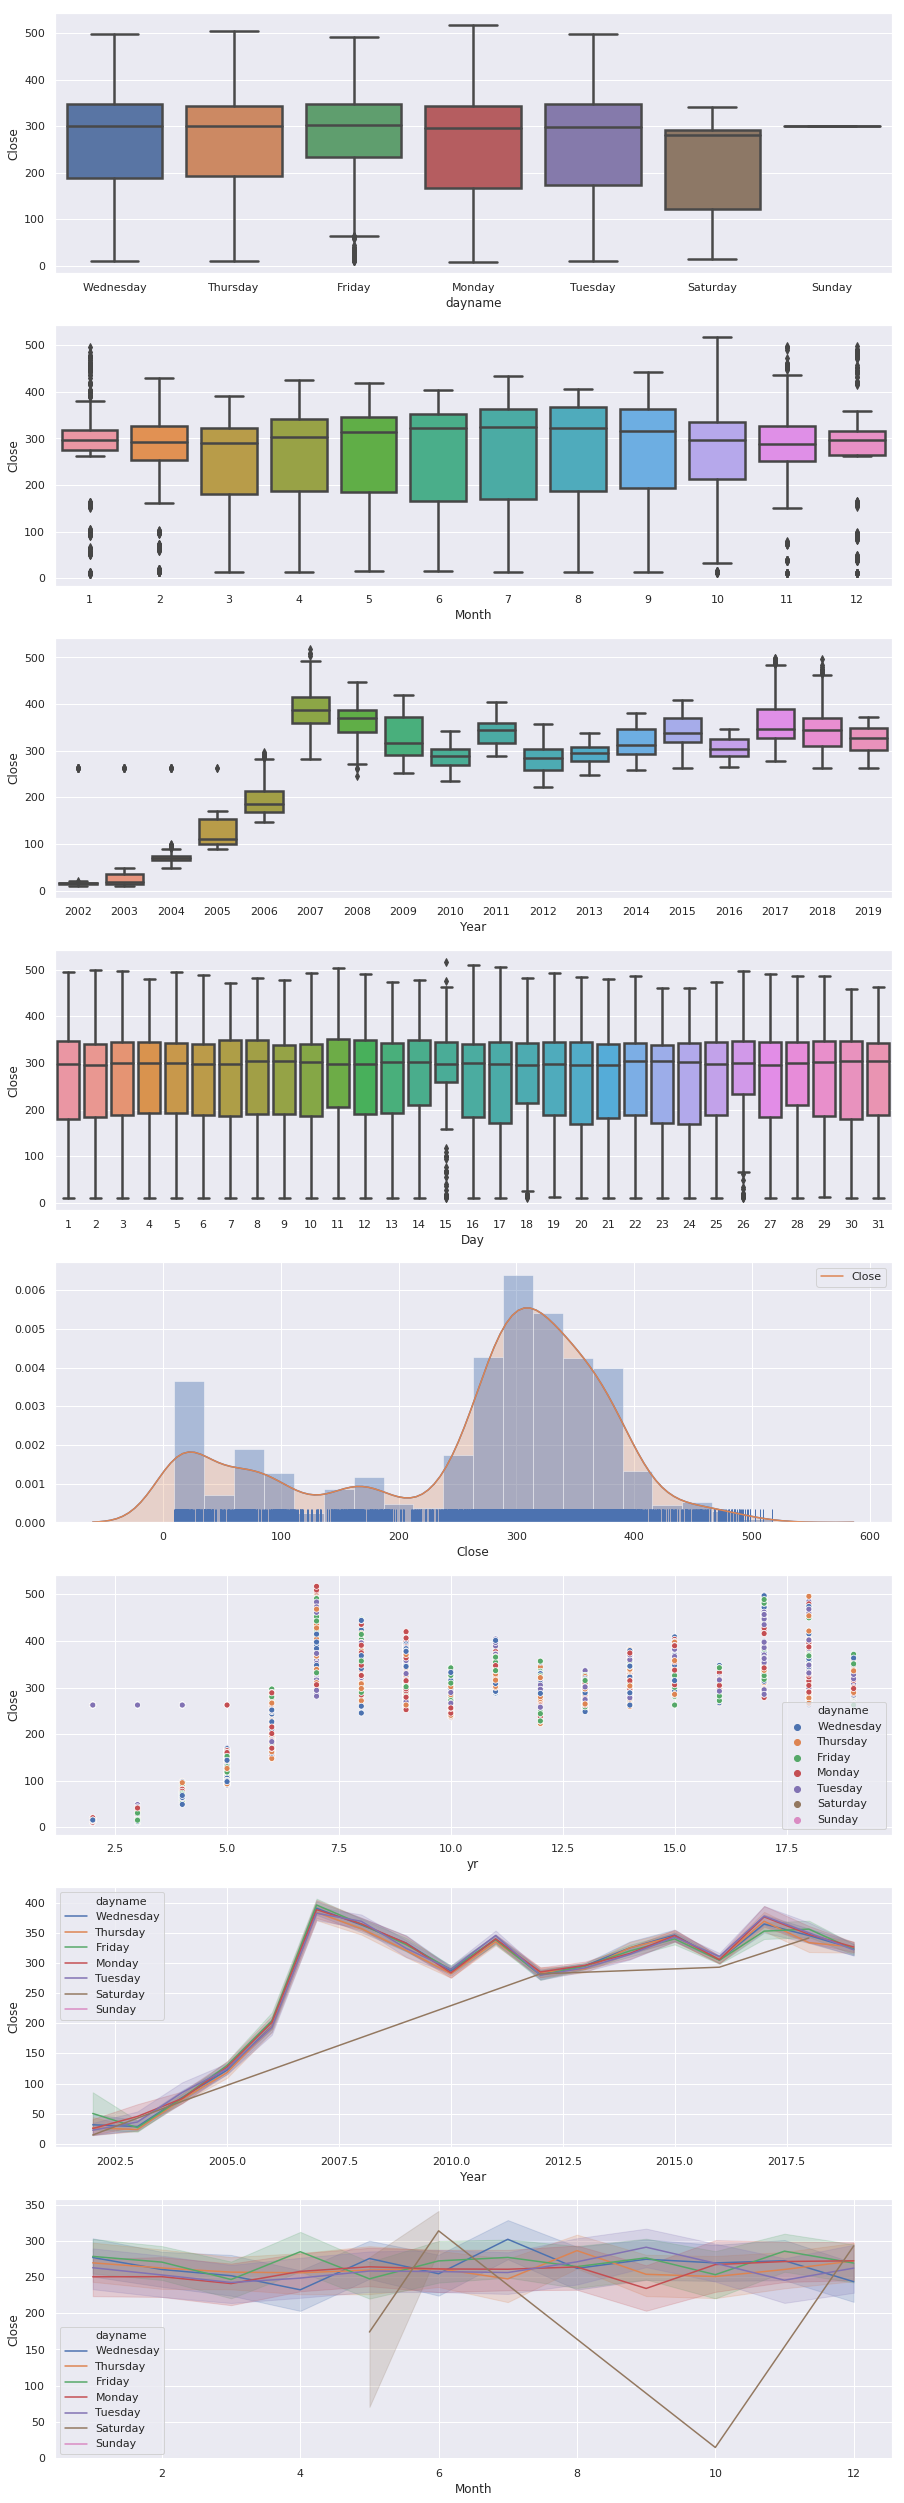

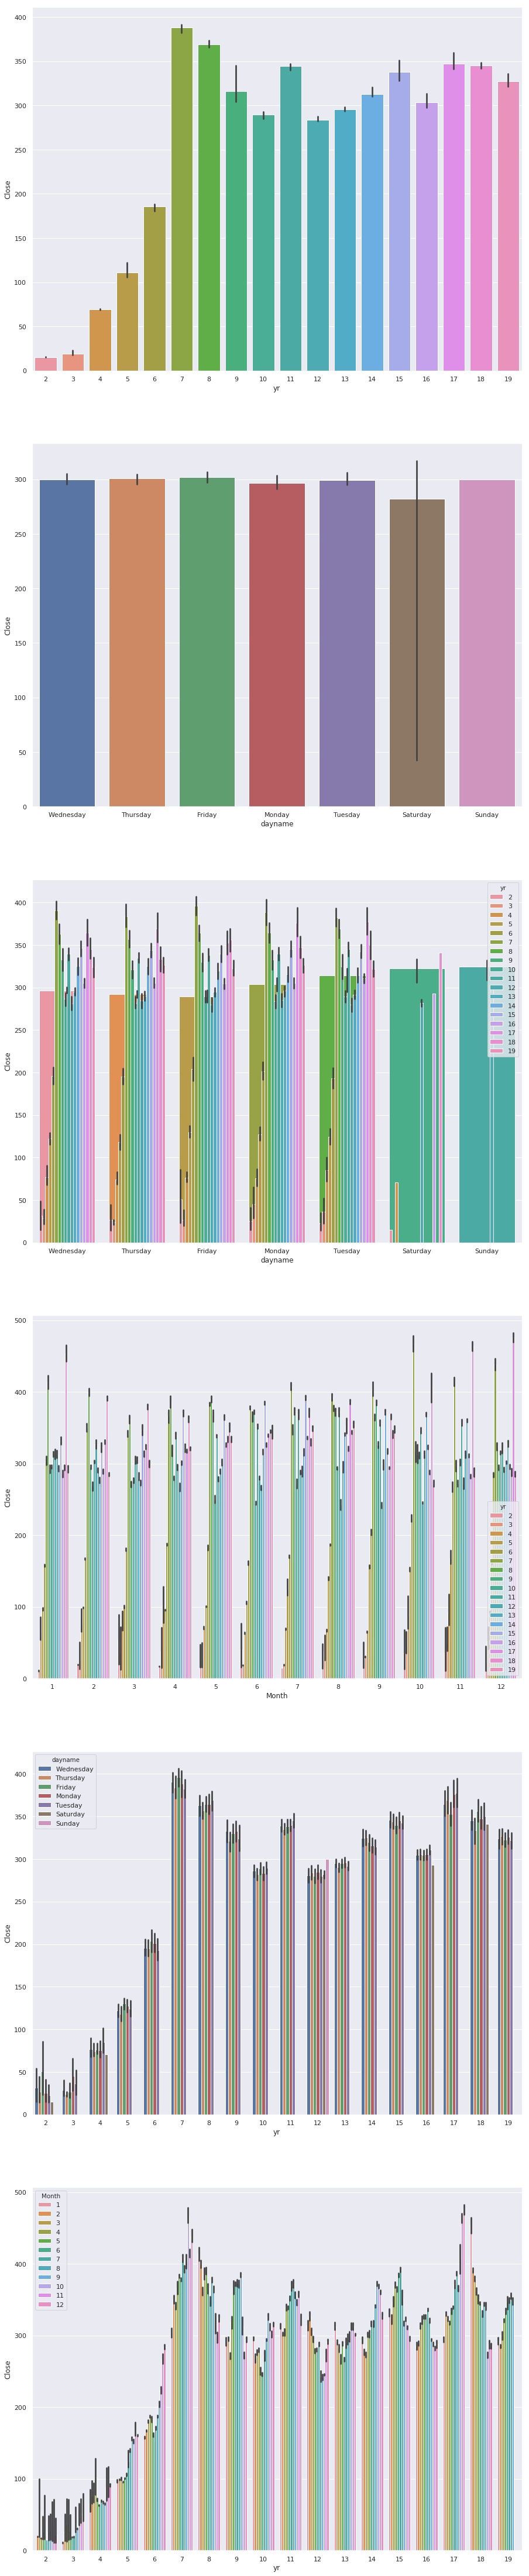

In [128]:
FNCOL("Close")
FunBar("Close")

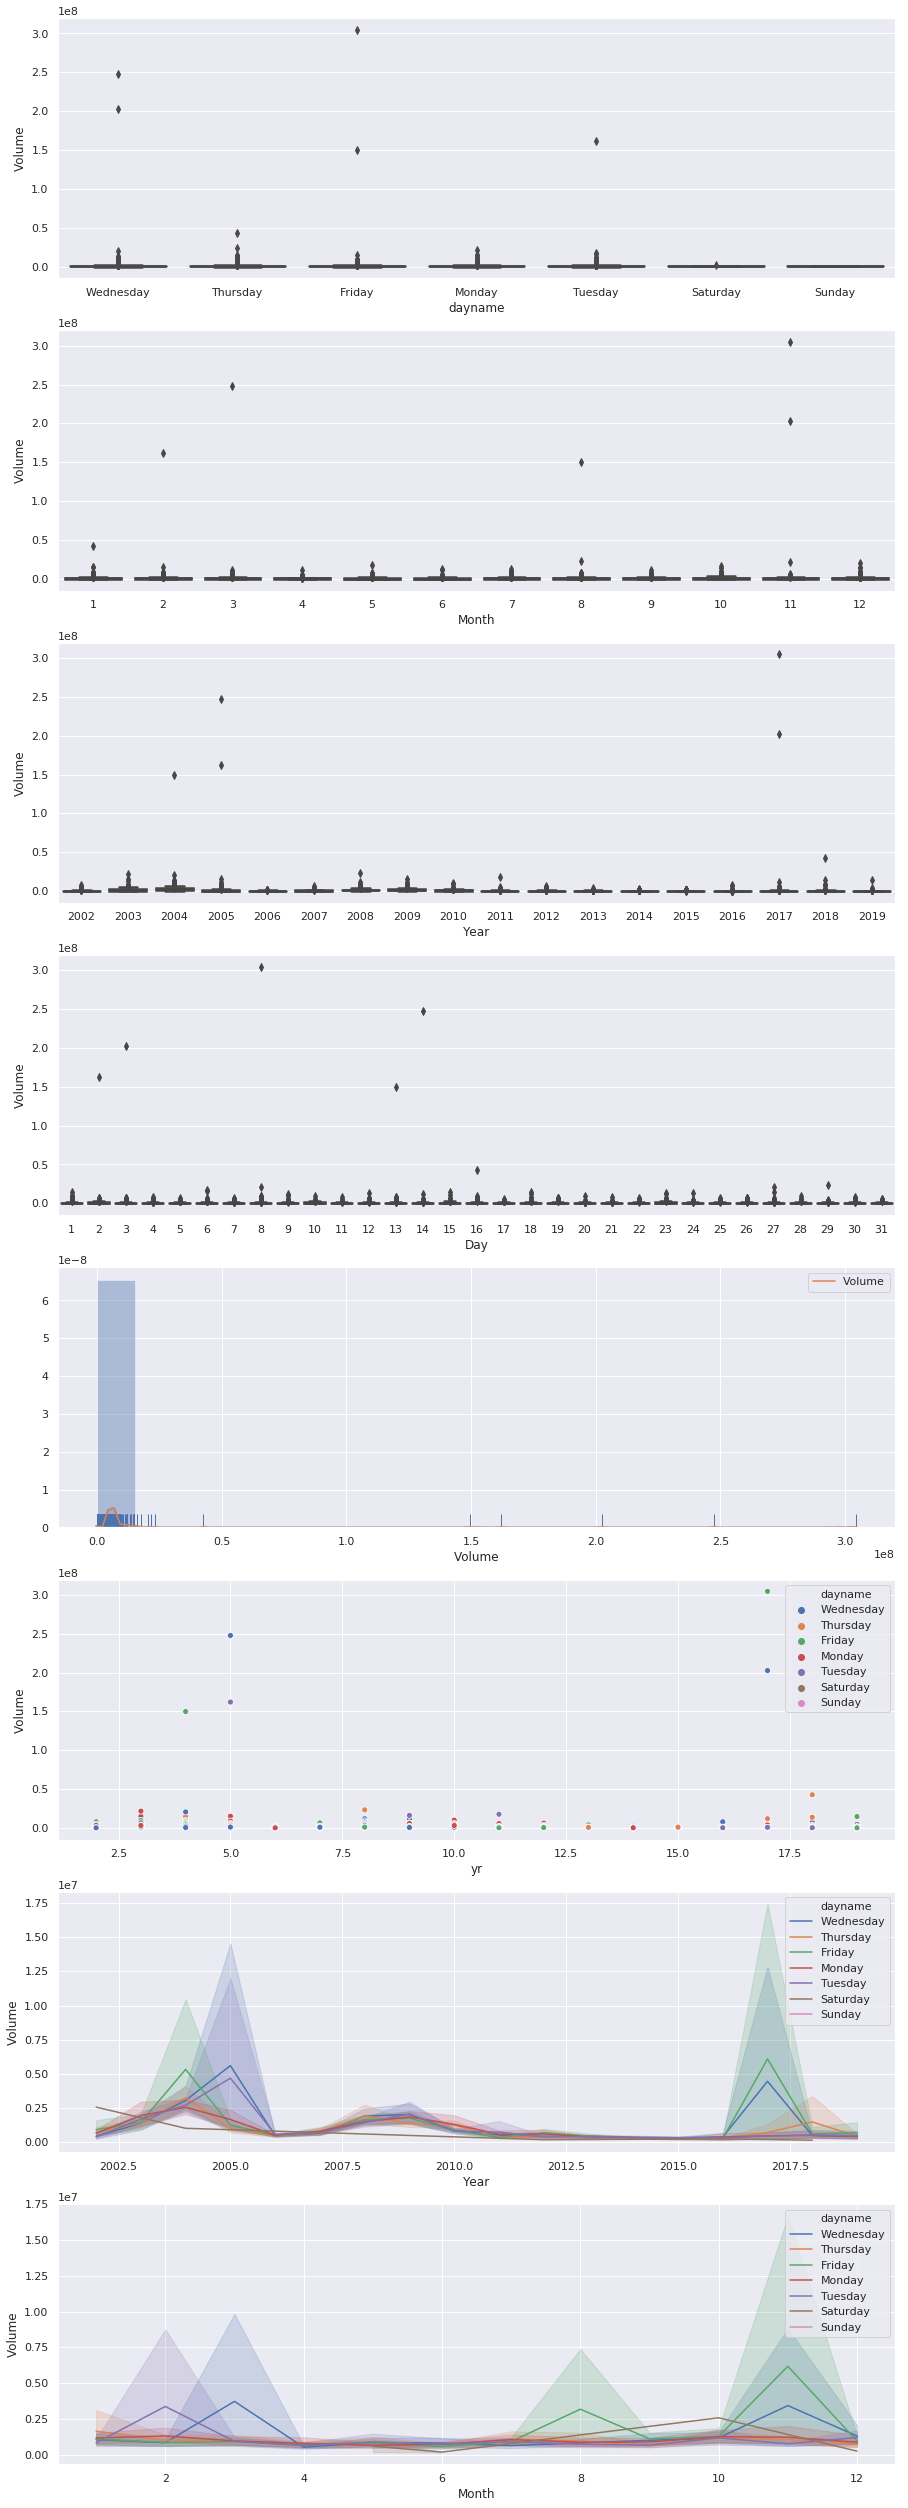

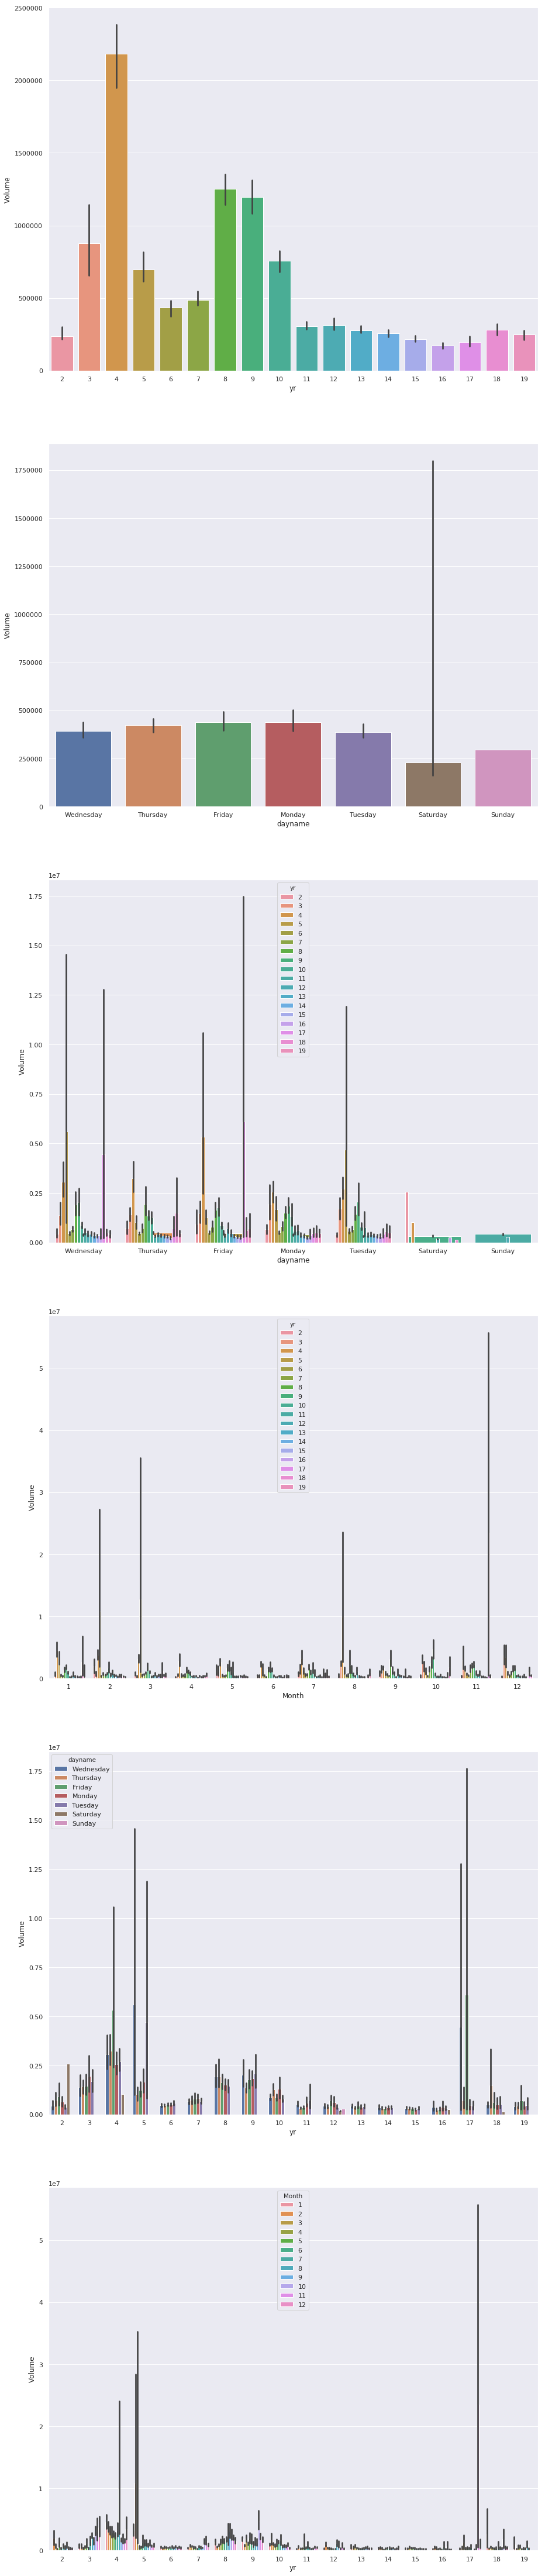

In [131]:
FNCOL("Volume")
FunBar("Volume")

In [0]:
def candle():
  import plotly.graph_objects as go
  fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                  open=df['Open'],
                  high=df['High'],
                  low=df['Low'],
                  close=df['Close'])])
  fig.update_layout(xaxis_rangeslider_visible=False)
  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['dayname'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['yr'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()
  fig = go.Figure(data=[go.Candlestick(x=df['Month'],
                       open=df['Open'], high=df['High'],
                       low=df['Low'], close=df['Close'])])
  fig.update_layout(  width=1000,
      height=500,xaxis_rangeslider_visible=False)

  fig.show()


In [149]:
candle()

In [154]:
df.head()

Date        Open        High         Low  ...  Month  Day    dayname  yr
2543  2012-04-02  309.595001  314.368988  309.595001  ...      4    2  Wednesday  12
1133  2006-07-20  165.009995  169.830002  164.436996  ...      7   20   Thursday   6
2912  2013-09-26  309.825012  310.283997  302.480988  ...      9   26     Friday  13
67    2002-05-24   15.583000   15.835500   15.192900  ...      5   24     Monday   2
2411  2011-09-20  353.980988  360.544006  353.980988  ...      9   20    Tuesday  11

[5 rows x 12 columns]

In [0]:
def funpreprocess(var):
  df = pd.read_csv(var)
  taget = 'Volume'
  nrows , ncols = df.shape
  df = df.drop_duplicates()
  from sklearn.utils import shuffle
  df = shuffle(df)
  Datetime=df['Date'].str.split('-', n = 3, expand = True)
  df['Year']=Datetime[0]
  df['Month']=Datetime[1]
  df['Day']=Datetime[2]
  import datetime 
  import calendar 
  def findDay(date):
    born=[]
    for i in range(0,len(date)):
      born.append(calendar.day_name[datetime.datetime.strptime(date[i], '%d %m %Y').weekday()] )

    return (born)
  df['Day'] = (df['Day']).astype(int)
  df['Month'] = (df['Month']).astype(int)
  df['Year'] = (df['Year']).astype(int)
  df['yr']=df['Year']-2000
  df['Open'] = df['Open'].fillna((df['Open'].mean()))
  df['High'] = df['High'].fillna((df['High'].mean()))
  df['Low'] = df['Low'].fillna((df['Low'].mean()))
  df['Close'] = df['Close'].fillna((df['Close'].mean()))
  df['Adj Close'] = df['Adj Close'].fillna((df['Adj Close'].mean()))
  df['Volume'] = df['Volume'].fillna((df['Volume'].mean()))
  return df


In [0]:
df_Airtel = funpreprocess('BO.csv')

df_MAX = funpreprocess('MAXINDIA.NS.csv')

df_SPICEJET = funpreprocess('SPICEJET.BO.csv')

df_TATA = funpreprocess('TATAMOTORS.BO.csv')

df_ADANI = funpreprocess('ADANIPOWER.BO.csv')


In [166]:
df_ADANI.head()

Date       Open       High        Low  ...  Year  Month  Day  yr
2148  2018-04-27  24.150000  25.400000  24.150000  ...  2018      4   27  18
1476  2015-08-05  28.500000  29.450001  28.299999  ...  2015      8    5  15
1761  2016-10-04  25.700001  26.000000  25.500000  ...  2016     10    4  16
654   2012-04-10  71.800003  73.000000  70.099998  ...  2012      4   10  12
1622  2016-03-10  30.250000  30.500000  29.700001  ...  2016      3   10  16

[5 rows x 11 columns]

In [167]:
df_MAX.head()


Date        Open        High         Low  ...  Year  Month  Day  yr
359  2017-12-26  126.449997  129.000000  125.150002  ...  2017     12   26  17
725  2019-06-25   67.650002   68.150002   65.400002  ...  2019      6   25  19
372  2018-01-12  123.000000  123.000000  121.000000  ...  2018      1   12  18
627  2019-01-25   85.300003   86.199997   84.800003  ...  2019      1   25  19
109  2016-12-23  140.899994  141.399994  139.699997  ...  2016     12   23  16

[5 rows x 11 columns]

In [169]:
df_Airtel.head()

Date        Open        High         Low  ...  Year  Month  Day  yr
2587  2012-06-06  267.138000  273.656006  262.088989  ...  2012      6    6  12
85    2002-06-19   15.835500   16.156799   15.376500  ...  2002      6   19   2
1516  2008-02-01  399.376007  422.739014  393.868011  ...  2008      2    1   8
2194  2010-11-04  302.940002  304.087006  298.992004  ...  2010     11    4  10
2789  2013-03-28  272.600006  272.600006  265.027008  ...  2013      3   28  13

[5 rows x 11 columns]

In [176]:
df_SPICEJET.head()

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Year, Month, Day, yr]
Index: []

In [187]:
df_TATA.head()

Date        Open        High         Low  ...  Year  Month  Day  yr
5839  2013-10-30  377.955994  380.132996  373.157013  ...  2013     10   30  13
5783  2013-08-06  280.498993  285.692993  277.333008  ...  2013      8    6  13
4953  2010-04-12  160.483002  160.483002  154.348007  ...  2010      4   12  10
5887  2014-01-09  367.071991  368.951996  361.184998  ...  2014      1    9  14
6492  2016-06-27  451.000000  457.450012  443.700012  ...  2016      6   27  16

[5 rows x 11 columns]

In [0]:
df_Airtel = funpreprocess('BO.csv')

df_MAX = funpreprocess('MAXINDIA.NS.csv')

df_SPICEJET = funpreprocess('SPICEJET.BO.csv')

df_TATA = funpreprocess('TATAMOTORS.BO.csv')

df_ADANI = funpreprocess('ADANIPOWER.BO.csv')


In [0]:
Open_mean = []
High_mean = [] 
low_mean = [] 
Close_mean = [] 
Volume_mean = []

def stat(df):
  import statistics
  Open_mean.append(statistics.mean(df['Open']))
  High_mean.append(statistics.mean(df['High']))
  low_mean.append(statistics.mean(df['Low']))
  Close_mean.append(statistics.mean(df['Close']))
  Volume_mean.append(statistics.mean(df['Volume']))

In [0]:
stat(df_Airtel)
stat(df_ADANI)
stat(df_MAX)
stat(df_SPICEJET)
stat(ALL_TATA)

In [249]:
new_d = {
    'Company': ['Airtel','ADANI','MAX','SPICEJET','TATA'],
   'Open_mean' : Open_mean ,
    'High_mean' : High_mean ,
    'low_mean' : low_mean ,
    'Close_mean' : Close_mean ,
    'Volume_mean' : Volume_mean 
}
ALL = pd.DataFrame(new_d)
ALL.head()

Company   Open_mean   High_mean    low_mean  Close_mean   Volume_mean
0    Airtel  262.977060  267.164108  258.046048  262.464795  1.161057e+06
1     ADANI   57.512515   58.504037   56.330803   57.328623  1.223542e+06
2       MAX  109.193316  110.902956  107.077185  108.819666  4.347351e+05
3  SPICEJET   46.797682   48.004281   45.484831   46.552337  2.940409e+06
4      TATA  217.115489  220.256835  213.479483  216.672707  2.968044e+06

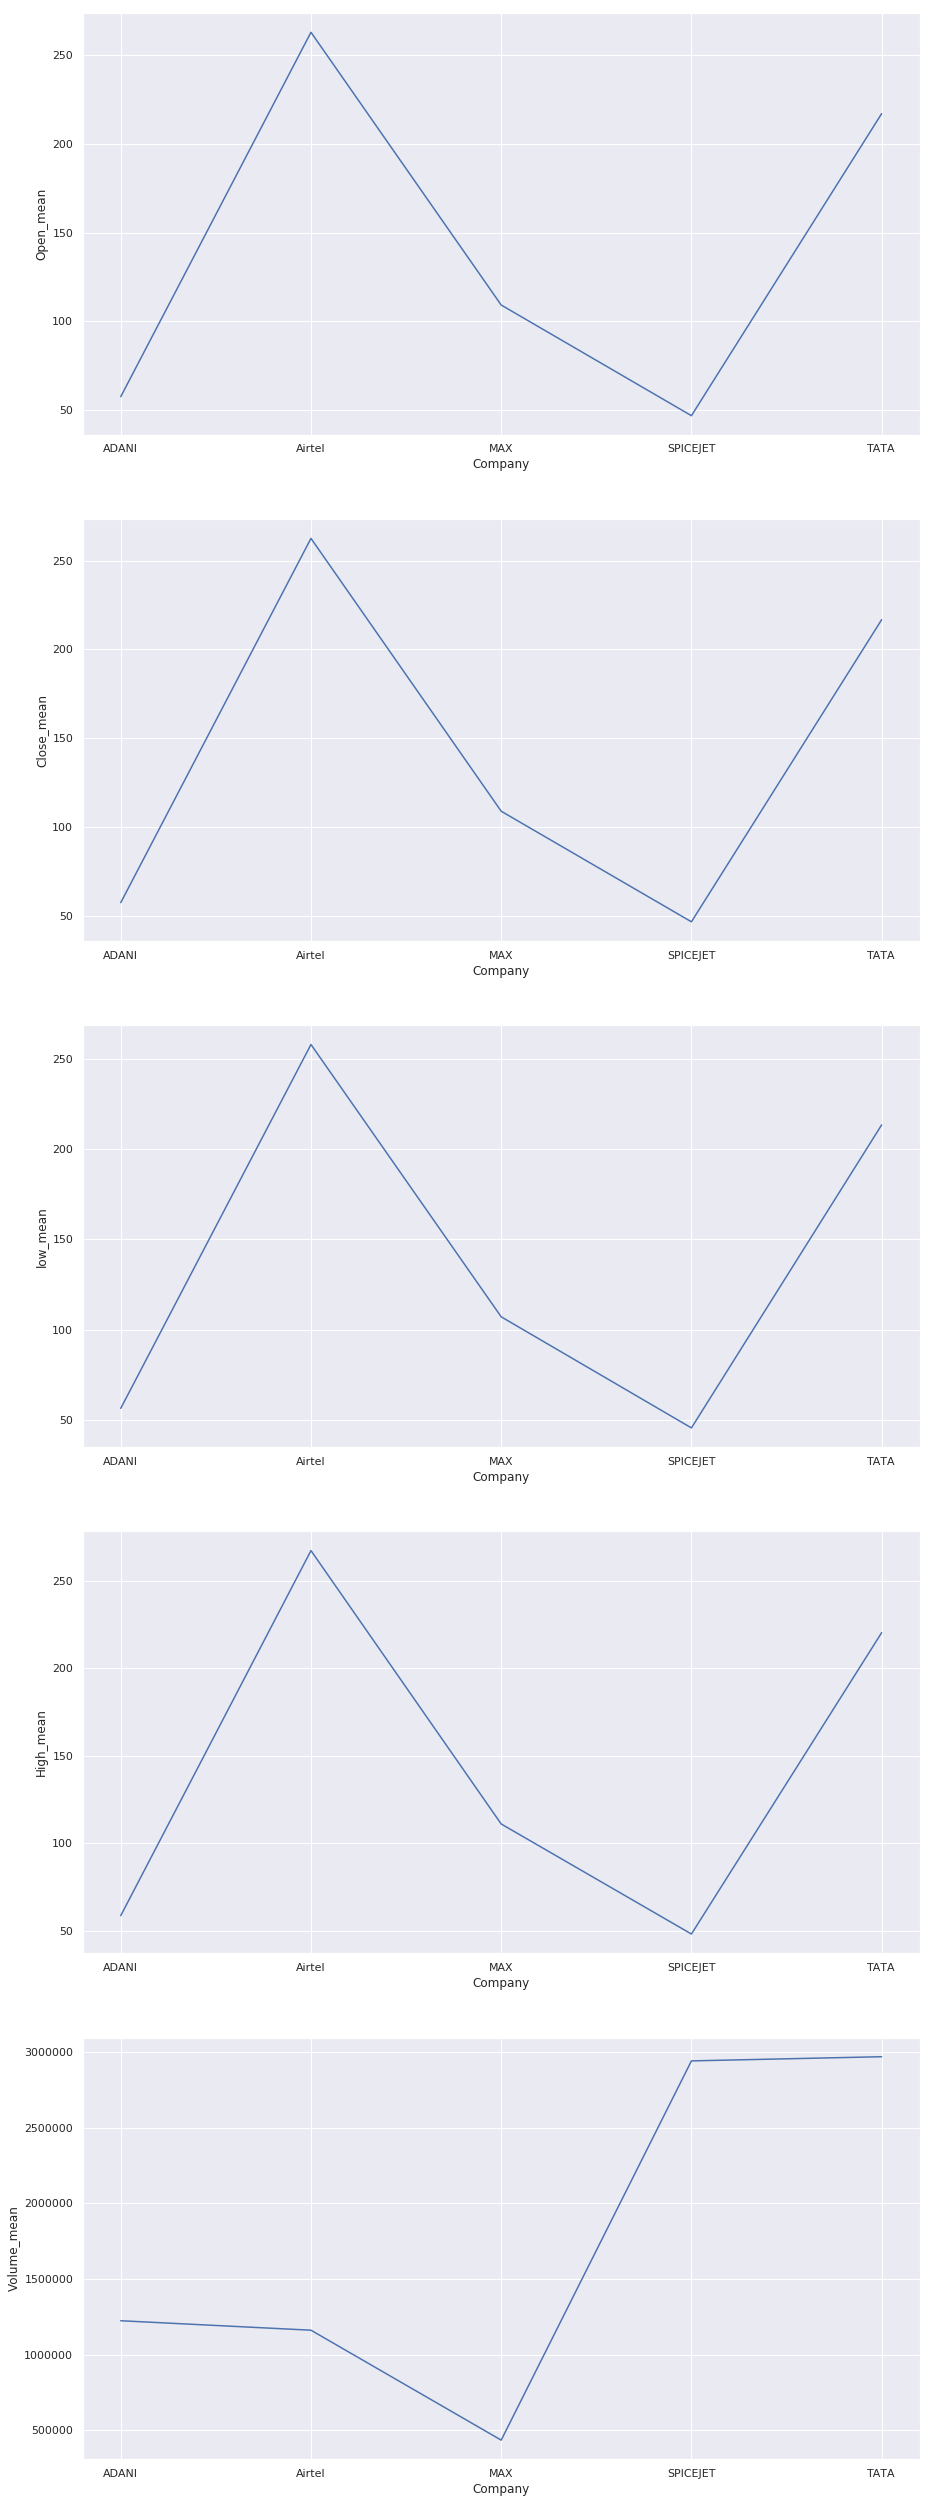

In [257]:
fig, axs = plt.subplots(nrows=5 , figsize=(15,45))
sns.lineplot(x="Company", y=ALL['Open_mean'], data=ALL , ax=axs[0])
sns.lineplot(x="Company", y=ALL['Close_mean'], data=ALL , ax=axs[1])
sns.lineplot(x="Company", y=ALL['low_mean'], data=ALL, ax=axs[2])
sns.lineplot(x="Company", y=ALL['High_mean'], data=ALL, ax=axs[3])
sns.lineplot(x="Company", y=ALL['Volume_mean'], data=ALL, ax=axs[4])



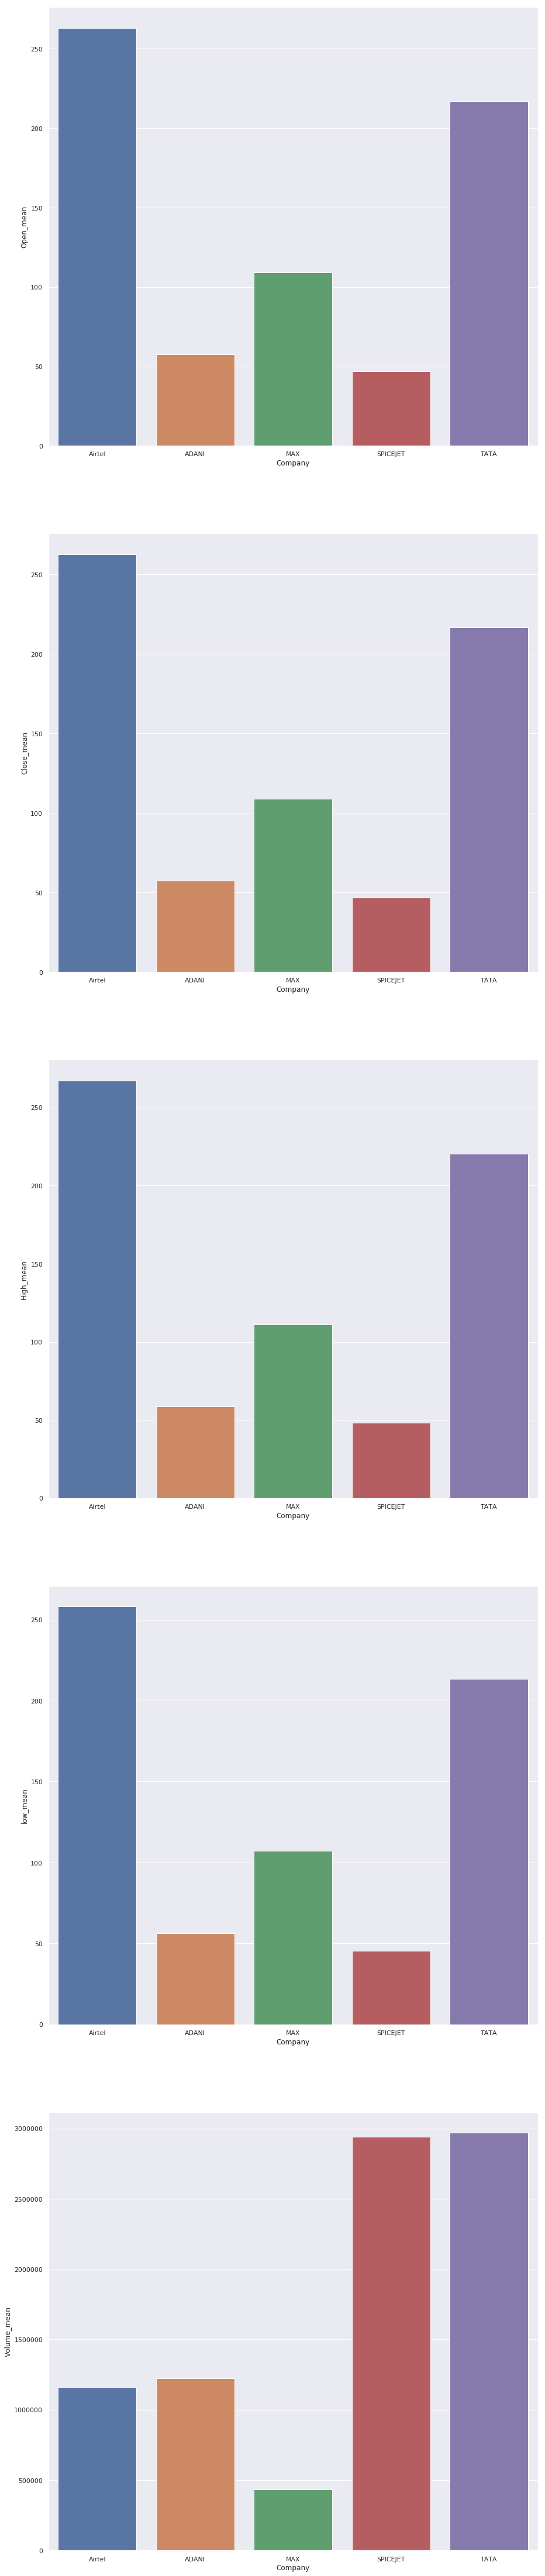

In [258]:
fig, axs = plt.subplots(nrows=5 , figsize=(15,80))
sns.barplot(x="Company", y=ALL['Open_mean'], data=ALL ,estimator=np.median,ax=axs[0])
sns.barplot(x="Company", y=ALL['Close_mean'], data=ALL ,estimator=np.median,ax=axs[1])
sns.barplot(x="Company", y=ALL['High_mean'], data=ALL ,estimator=np.median,ax=axs[2])
sns.barplot(x="Company", y=ALL['low_mean'], data=ALL ,estimator=np.median,ax=axs[3])
sns.barplot(x="Company", y=ALL['Volume_mean'], data=ALL ,estimator=np.median,ax=axs[4])

In [0]:
def Ana(var):
  d1 = df_Airtel.groupby('yr').mean()
  l1 = list(d[var])
  d2 = df_ADANI.groupby('yr').mean()
  l2 = list(d[var])
  d3 = df_MAX.groupby('yr').mean()
  l3 = list(d[var])
  d4 = df_SPICEJET.groupby('yr').mean()
  l4 = list(d[var])
  d5 = df_TATA.groupby('yr').mean()
  l5 = list(d[var])
  return l1,l2,l3,l4,l5

In [220]:
l1,l2,l3,l4,l5 = Ana('Open')
new_d = {
   'Airtel_Open' : l1 ,
    'ADANI_Open' : l2 ,
    'MAX_Open' : l3 ,
    'SPICEJET_Open' : l4 ,
    'TATA_Open' : l5 
}
Open_ALL = pd.DataFrame(new_d)
Open_ALL.head()

Airtel_Open  ADANI_Open    MAX_Open  SPICEJET_Open   TATA_Open
0    31.446625   31.446625   31.446625      31.446625   31.446625
1    46.621908   46.621908   46.621908      46.621908   46.621908
2    86.088412   86.088412   86.088412      86.088412   86.088412
3    93.438160   93.438160   93.438160      93.438160   93.438160
4   158.025255  158.025255  158.025255     158.025255  158.025255

In [222]:
l1,l2,l3,l4,l5 = Ana('Close')
new_d = {
   'Airtel_Close' : l1 ,
    'ADANI_Close' : l2 ,
    'MAX_Close' : l3 ,
    'SPICEJET_Close' : l4 ,
    'TATA_Close' : l5 
}
Close_ALL = pd.DataFrame(new_d)
Close_ALL.head()

Airtel_Close  ADANI_Close   MAX_Close  SPICEJET_Close  TATA_Close
0     31.356148    31.356148   31.356148       31.356148   31.356148
1     46.686596    46.686596   46.686596       46.686596   46.686596
2     85.892606    85.892606   85.892606       85.892606   85.892606
3     93.399998    93.399998   93.399998       93.399998   93.399998
4    157.637741   157.637741  157.637741      157.637741  157.637741

In [223]:
l1,l2,l3,l4,l5 = Ana('High')
new_d = {
   'Airtel_High' : l1 ,
    'ADANI_High' : l2 ,
    'MAX_High' : l3 ,
    'SPICEJET_High' : l4 ,
    'TATA_High' : l5 
}
High_ALL = pd.DataFrame(new_d)
High_ALL.head()

Airtel_High  ADANI_High    MAX_High  SPICEJET_High   TATA_High
0    31.969307   31.969307   31.969307      31.969307   31.969307
1    47.406182   47.406182   47.406182      47.406182   47.406182
2    87.499202   87.499202   87.499202      87.499202   87.499202
3    94.827635   94.827635   94.827635      94.827635   94.827635
4   160.571624  160.571624  160.571624     160.571624  160.571624

In [225]:
l1,l2,l3,l4,l5 = Ana('Low')
new_d = {
   'Airtel_Low' : l1 ,
    'ADANI_Low' : l2 ,
    'MAX_Low' : l3 ,
    'SPICEJET_Low' : l4 ,
    'TATA_Low' : l5 
}
Low_ALL = pd.DataFrame(new_d)
Low_ALL.head()

Airtel_Low   ADANI_Low     MAX_Low  SPICEJET_Low    TATA_Low
0   30.844846   30.844846   30.844846     30.844846   30.844846
1   45.865168   45.865168   45.865168     45.865168   45.865168
2   84.380482   84.380482   84.380482     84.380482   84.380482
3   91.993589   91.993589   91.993589     91.993589   91.993589
4  154.774280  154.774280  154.774280    154.774280  154.774280

In [227]:
l1,l2,l3,l4,l5 = Ana('Volume')
new_d = {
   'Airtel_Volume' : l1 ,
    'ADANI_Volumew' : l2 ,
    'MAX_Volume' : l3 ,
    'SPICEJET_Volume' : l4 ,
    'TATA_Volume' : l5 
}
Volume_ALL = pd.DataFrame(new_d)
Volume_ALL.head()

Airtel_Volume  ADANI_Volumew    MAX_Volume  SPICEJET_Volume   TATA_Volume
0   3.884528e+06   3.884528e+06  3.884528e+06     3.884528e+06  3.884528e+06
1   6.181861e+06   6.181861e+06  6.181861e+06     6.181861e+06  6.181861e+06
2   1.037272e+07   1.037272e+07  1.037272e+07     1.037272e+07  1.037272e+07
3   3.577720e+06   3.577720e+06  3.577720e+06     3.577720e+06  3.577720e+06
4   2.932095e+06   2.932095e+06  2.932095e+06     2.932095e+06  2.932095e+06

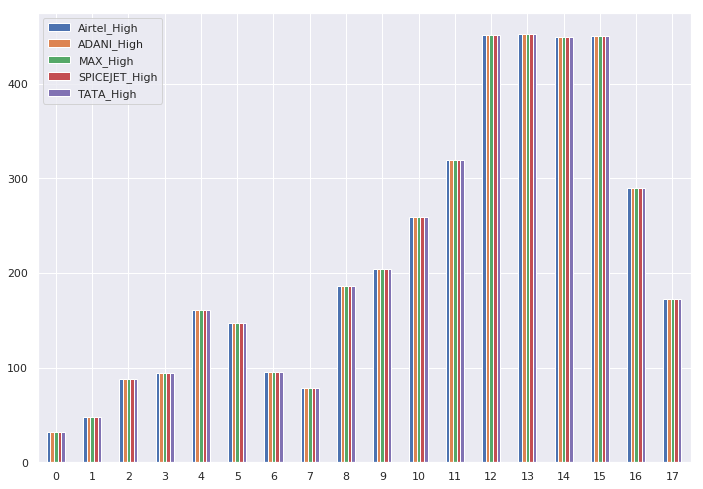

In [231]:
High_ALL.plot.bar(rot=0)

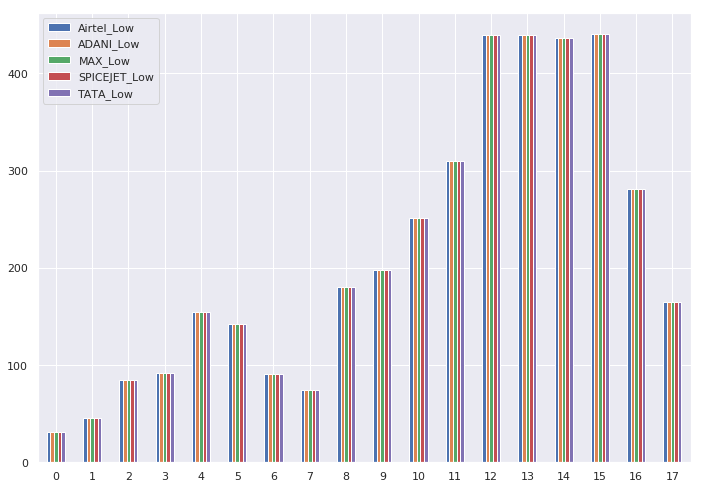

In [232]:
Low_ALL.plot.bar(rot=0)

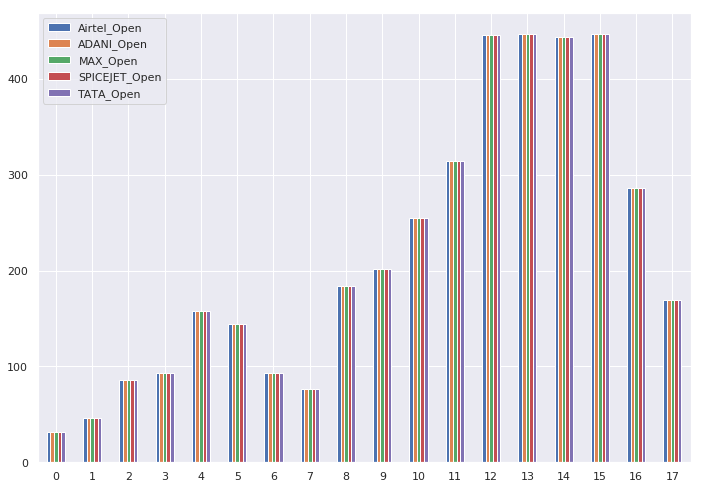

In [233]:
Open_ALL.plot.bar(rot=0)

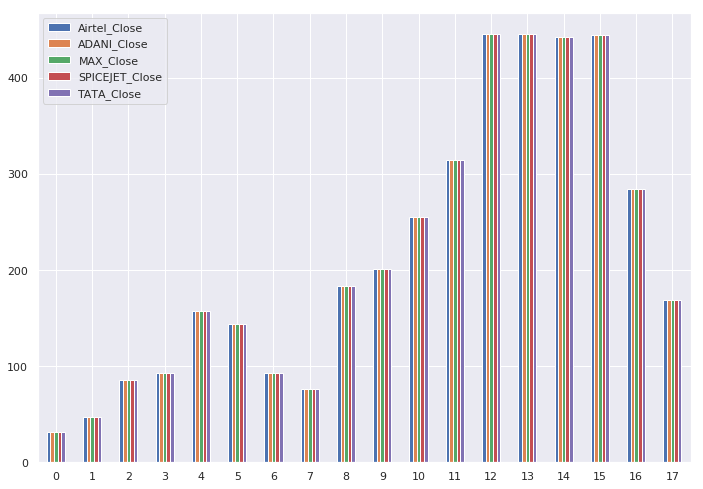

In [234]:
Close_ALL.plot.bar(rot=0)

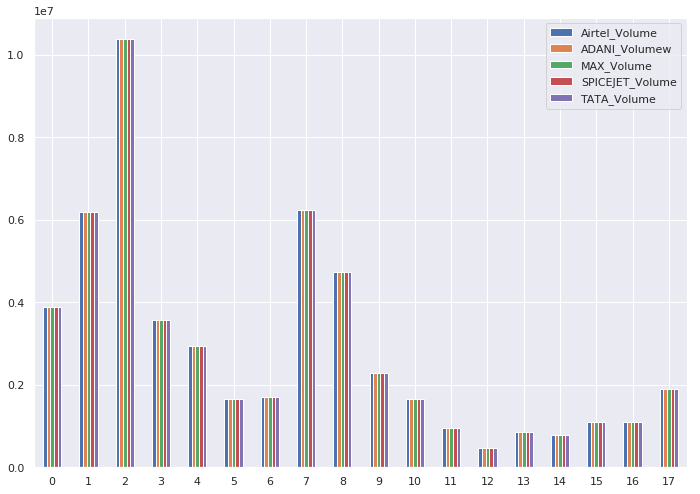

In [235]:
Volume_ALL.plot.bar(rot=0)

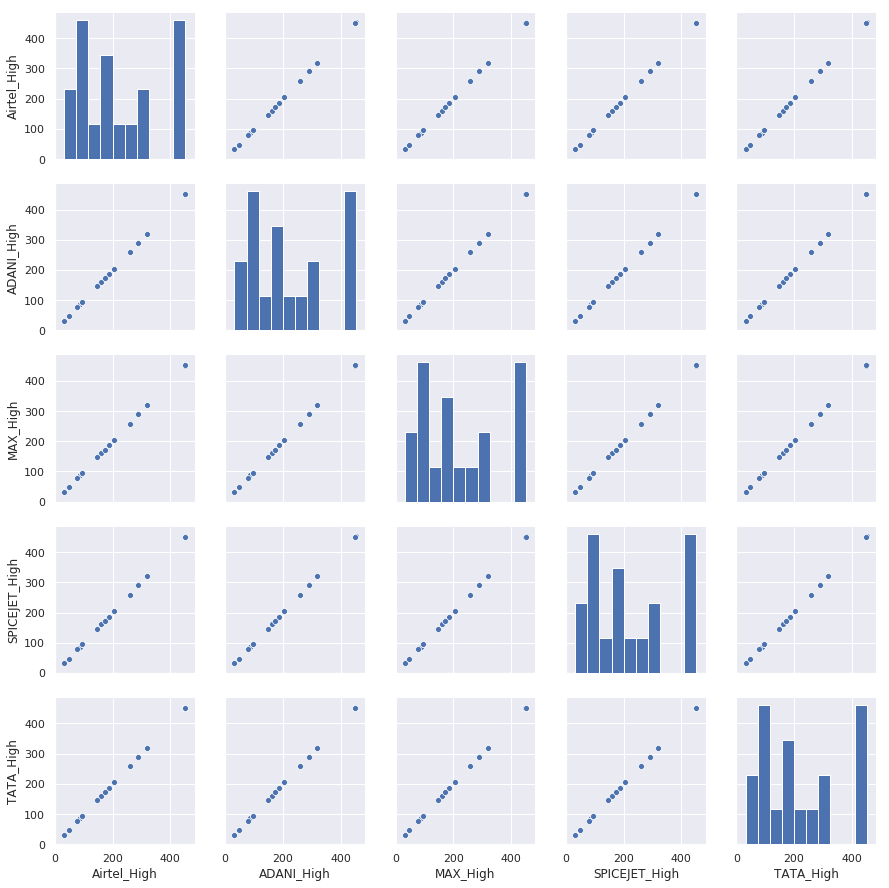

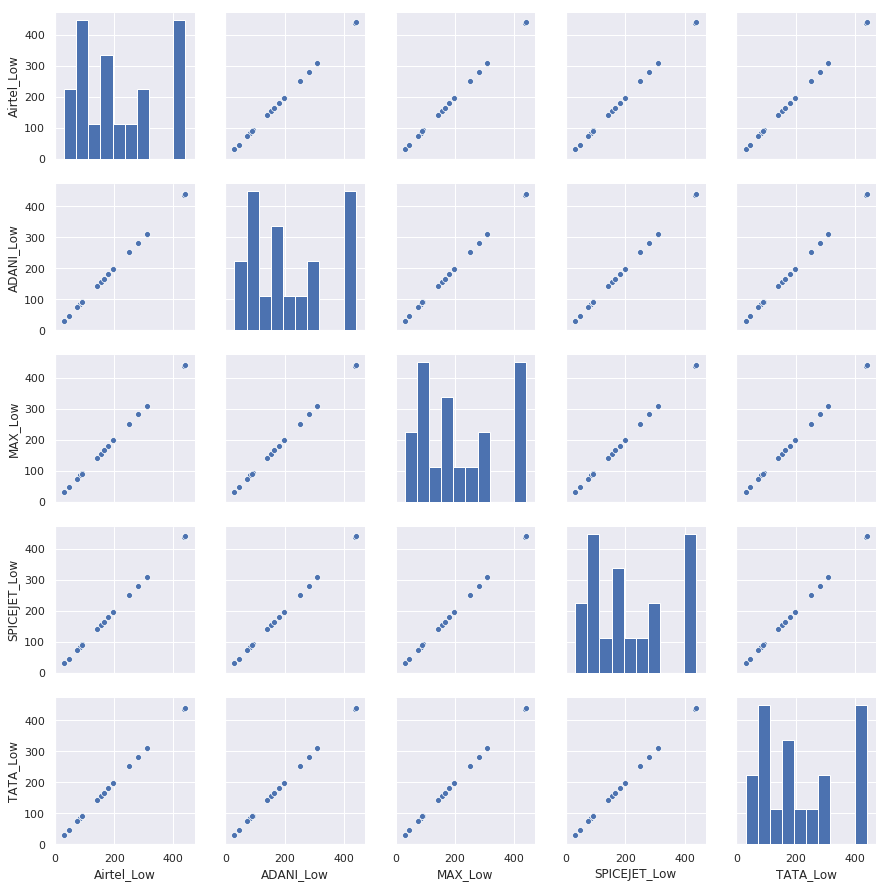

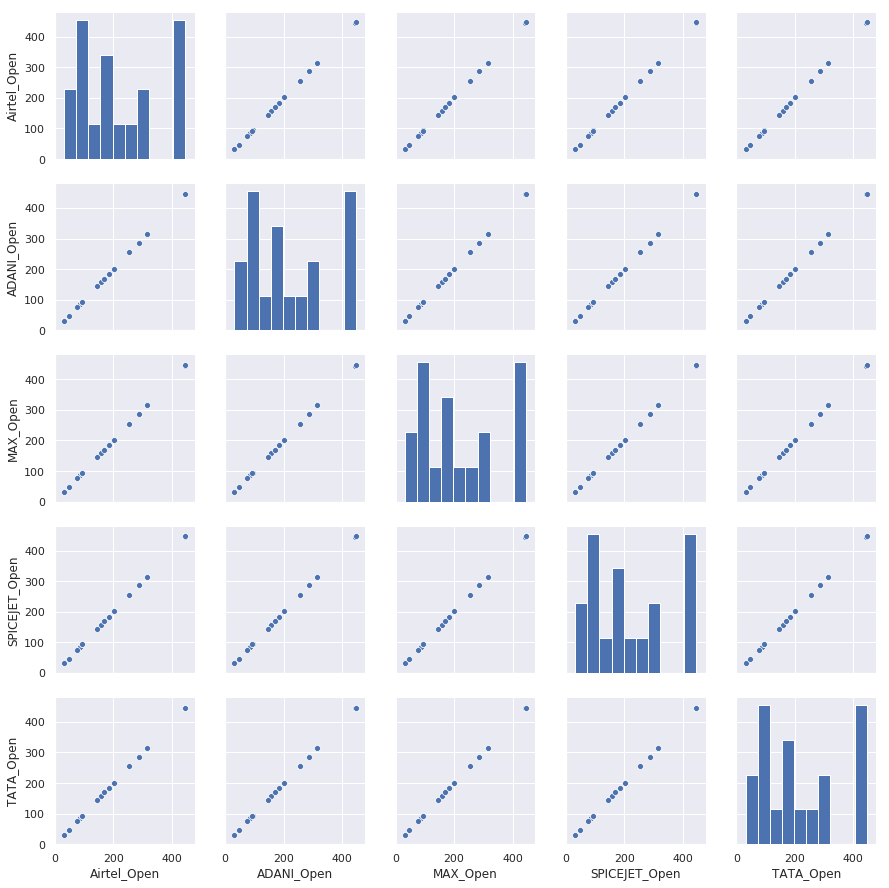

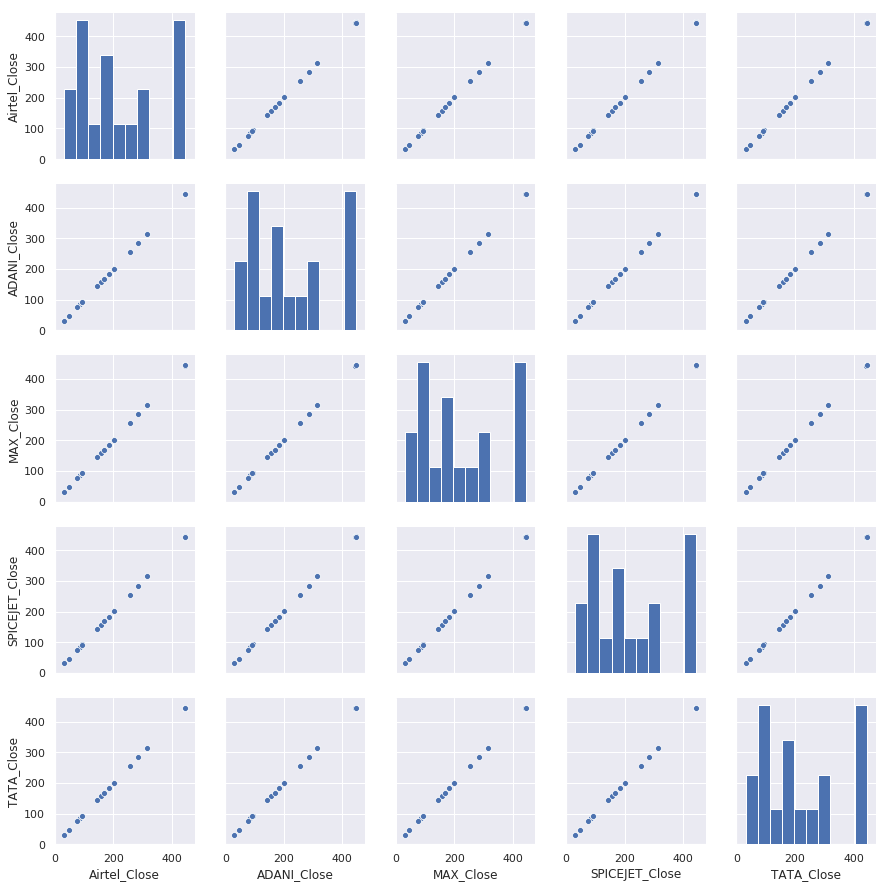

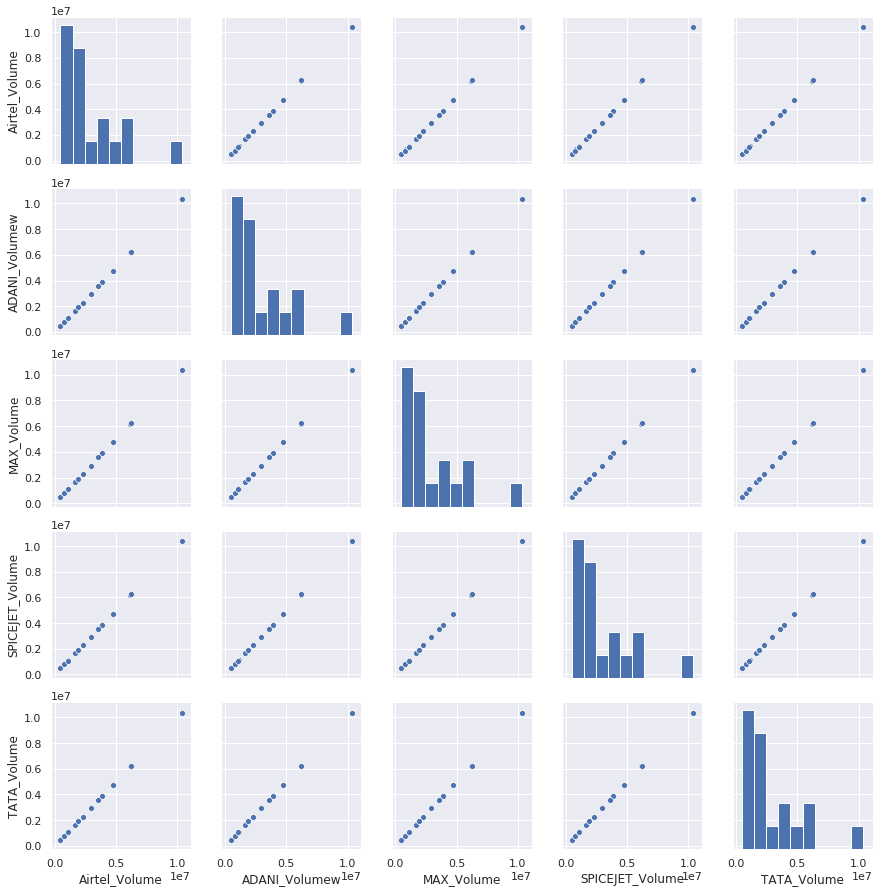

In [240]:
sns.pairplot(High_ALL)
sns.pairplot(Low_ALL)
sns.pairplot(Open_ALL)
sns.pairplot(Close_ALL)
sns.pairplot(Volume_ALL)

In [0]:
ALL.to_csv('ALL_meanANALYSISf.csv')

In [0]:
High_ALL.to_csv('High_ALL.csv')
Low_ALL.to_csv('Low_ALL.csv')
Open_ALL.to_csv('Open_ALL.csv')
Close_ALL.to_csv('Close_ALL.csv')
Volume_ALL.to_csv('Volume_ALL.csv')